# **Creating a Linear Regression Model**

## **Importing Libraries for data handling, visualisation, model training, and evaluation.**

In [3]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

- **Pandas** - analysing, cleaning, exploring, and manipulating data- **Numpy** - working with arrays. It also has functions for working in domain of linear algebra, fourier transform and matrices.
- **Matplotlib.pylot** - Each pyplot function makes some change to a figure e.g., creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. in matplotlib.
- **Scikit-learn (sklearn)** - is an open source data analysis library, and the gold standard for Machine Learning (ML) in Python. It has Algorithmic decision-making methods, including Classification, which identifies and catergorises data based on patternss.


## **Loading the Automobile Dataset and naming the columns accordingly**

In [6]:
# Loading the exploring the dataset

In [7]:
data = pd.read_csv('Automobile-dataset.csv')
print(data)

      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0         130    3504          12.0    70   
1    15.0          8         350.0         165    3693          11.5    70   
2    18.0          8         318.0         150    3436          11.0    70   
3    16.0          8         304.0         150    3433          12.0    70   
4    17.0          8         302.0         140    3449          10.5    70   
..    ...        ...           ...         ...     ...           ...   ...   
387  27.0          4         140.0          86    2790          15.6    82   
388  44.0          4          97.0          52    2130          24.6    82   
389  32.0          4         135.0          84    2295          11.6    82   
390  28.0          4         120.0          79    2625          18.6    82   
391  31.0          4         119.0          82    2720          19.4    82   

     origin                       name  
0         1  chevrolet

In [8]:
# Shows all column names in a dataset
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [9]:
# Shows info about the dataset (datatypes)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


## **Data Preprocessing: Handling missing values to ensure that all features are numeric**

In [11]:
# Data Preprocessing
# Handling the missing values (remove rows with missing values)
data = data.dropna()

In [12]:
# Checking for missing values
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

## **Defining Features and Target Variable: Selecting the features and setting 'mpg' as the target variable**

Linear Regression needs input variables (features) which will predict your output variable (target variable). As we want to predict MPG, other columns like Year will be the features.

In [15]:
# Defining features (X) and target variable (y)
X = data[['acceleration', 'weight', 'horsepower', 'displacement', 'cylinders']]
y = data['mpg']

## **Splitting the data into training (80%) and testing (20%) sets**

When building a machine learning model, we need to train the model on a dataset, so it can understand the underlying structure and statistics. The typical split is 80% Train, 20% Test. 
Sometimes you may see this split 75% Train and 25% Test.

In [18]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Our training set is the feature model (X = acceleration etc)
- Test set is the "mpg" data

## **Intialising Model & Training the Model: Training the model using the Training data**

Training the Model using the Ordinary Least Squares Algorithm. This is the algorithm which Linear Regression uses.

In [22]:
# Initialising the Linear Regression model using statsmodel for p-values
X_train_sm = sm.add_constant(X_train) # Adding a constant term for intercept
model_sm = sm.OLS(y_train, X_train_sm).fit() # Fit model using Ordinary least squares

## **Model summary: Displaying the summary which includes p-values**

Once the model has been trained, it is worth looking at some of the summary of the model. Using the summary() function to view coefficiencts, standard error, R-Squared value and other statistical properties that are useful in determining the models performance. 

In [25]:
# Determining the summary which includes p-values
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     155.3
Date:                Wed, 18 Sep 2024   Prob (F-statistic):           7.57e-82
Time:                        22:40:48   Log-Likelihood:                -895.42
No. Observations:                 313   AIC:                             1803.
Df Residuals:                     307   BIC:                             1825.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           46.8371      2.955     15.849   

The P-value which is denoted as P>|t| in this case can determine the suitability of the feature being used within the model. TThe model could be enhanced by removing certain varaibles with p-values creater than 0.05.

## **Make Predictions: Predict MPG on the test set**

Looking at the Test dataset agaisnt our trained model to predict values.

In [29]:
# Making predictions on the testing set
X_test_sm = sm.add_constant(X_test) # Adding constant term for the test set (the value at which the fitted line crosses the y-axis)
y_pred = model_sm.predict(X_test_sm)

## **Evaluating the Model: Calculing the Mean Squared Error and R-squared value to assess the models performance**

Some of the key performance indicators are the Mean Squared Error and R-Squared. 

In [32]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 17.94
R-squared (R2): 0.65


65% of the variability of the response data

## **Plot the Results: Plot a graph comparing Actual vs Predicted MPG values**

Can plot the actual MPG values against the predicted MPG values to see how the model has compared with accuracy

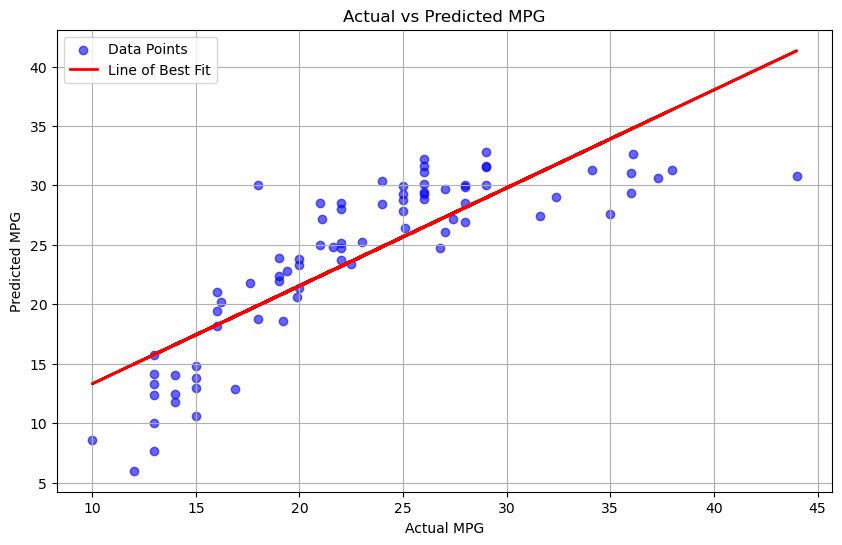

In [36]:
# Plottinf the results with line of best fit
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Data Points')
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG")
plt.grid(True)

# line of best fit
line_fit = np.polyfit(y_test, y_pred, 1) # 1 is the degree of the polynomial (linear fir)
plt.plot(y_test, np.polyval(line_fit, y_test), color='red', linewidth=2, label='Line of Best Fit')

plt.legend()
plt.show()

## **Model Residuals: Plot Model Residuals**

When the model predicted values is not the same as the actual, the difference between these are residuals. When the residual are near 0, this is considered as a "good fit".

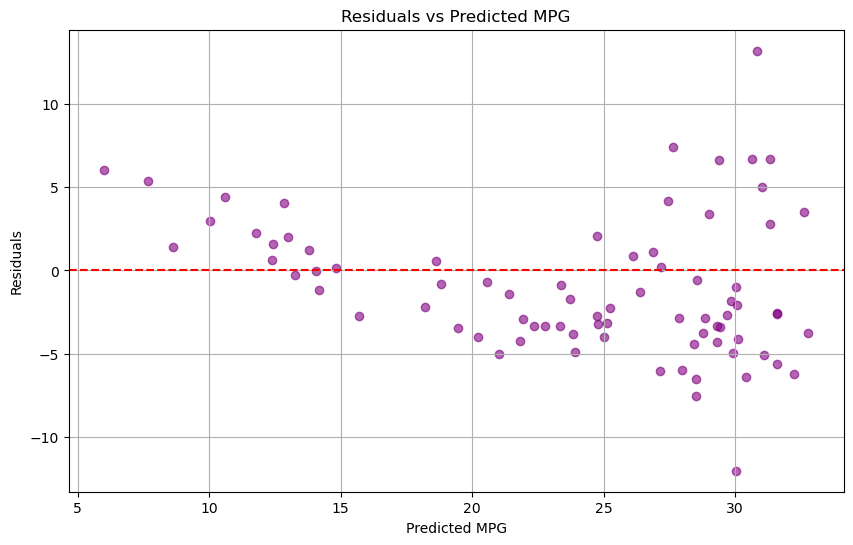

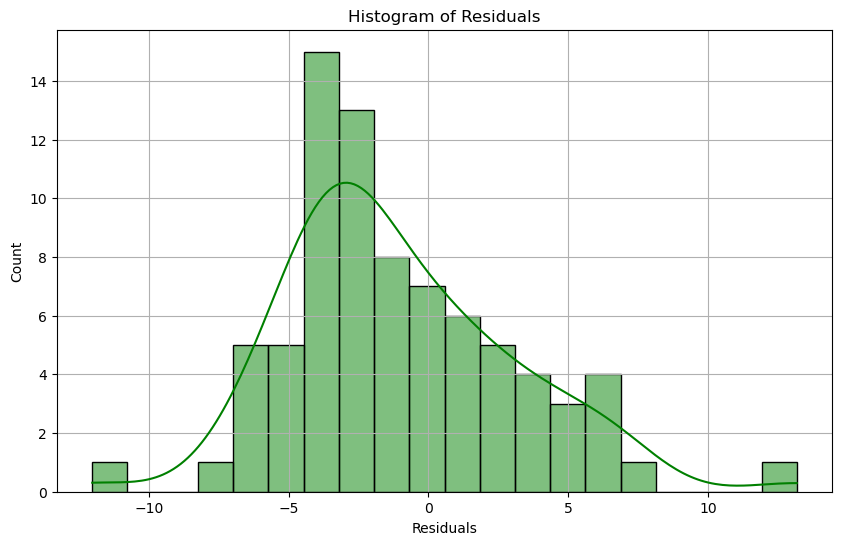

In [39]:
# Model Diagnostics
import seaborn as sns
# Residuals
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted MPG")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted MPG")
plt.grid(True)
plt.show()

# Histogram of Residuals
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True, color='green', bins=20)
plt.xlabel("Residuals")
plt.title("Histogram of Residuals")
plt.grid(True)
plt.show()

## **Principle Component Analysis and Linear Regression**

Machine learning models sometimes contain a large amount of different variables to consider. This high dimensionality can make the model very complex. PCA is a statistical technique often used in regression analysis, especially when dealing with high-dimensional data. Its primary purpose in the context of regression is to reduce the dimensionality of the data while retaining as much variability as possible, thereby improving model perfomance and interpretability.

- PCA is an unsupervised learning algorithm

We need to scale our data so that each feature has a single unit variance

In [43]:

from sklearn.preprocessing import StandardScaler

In [44]:
# Normalising the data

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [45]:
scaled_data = scaler.transform(X)

PCA with Scikit Learn use a very similar process to other preprocessing functions that come with SciKit Learn. We instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform().

We can also specify how many components we want to keep when creating the PCA object.

In [47]:
from sklearn.decomposition import PCA

In [48]:
pca = PCA(n_components = 2)

In [49]:
pca.fit(scaled_data)

PCA(n_components=2)

- Now we can transform this data to its first 2 principal components

In [51]:
x_pca = pca.transform(scaled_data)

In [52]:
scaled_data.shape

(392, 5)

In [53]:
x_pca.shape

(392, 2)

- We have reduced 5 dimensions to 2

## **PCA Visualisation**

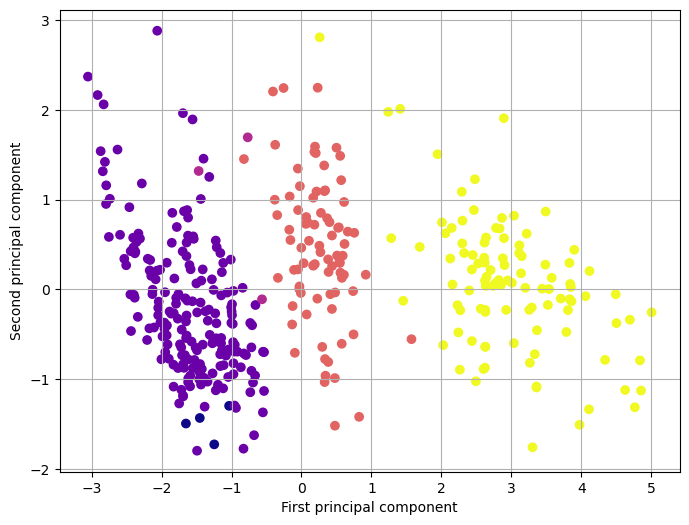

In [68]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=X['cylinders'], cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.grid(True)  # This adds the grid lines
plt.show()


By seperating the two components, we can easily seprate the three classes.

## **Interperting the components**

Unfortunetly, with the great power of dimensionality reduction, comes the cost of being able to easily understand what these components represent.

The components correspond to combinations of the orginal features, the compnents themselves are stored as an attribute of the fitted object.

In [61]:
pca.components_

array([[-0.3313787 ,  0.46179021,  0.47384374,  0.4824044 ,  0.46871748],
       [ 0.8857363 ,  0.34528638, -0.11998855,  0.17862974,  0.2234786 ]])

In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. we can visualise this relationship with a heatmap:

In [70]:
df_comp = pd.DataFrame(pca.components_,columns=X.columns)

<Axes: >

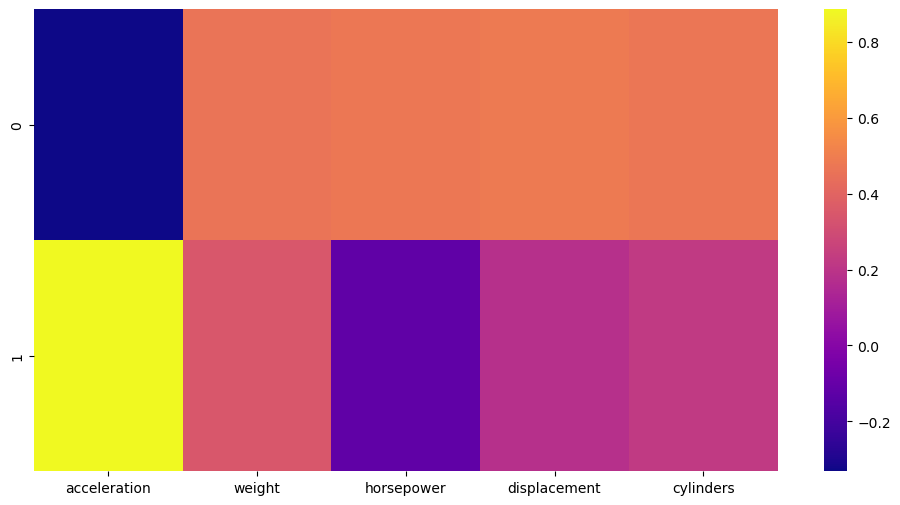

In [72]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.